In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline




warnings.filterwarnings('ignore')


In [192]:
pip install --upgrade matplotlib


Requirement already up-to-date: matplotlib in c:\users\david\anaconda3\envs\learn-env\lib\site-packages (3.7.5)
Note: you may need to restart the kernel to use updated packages.


In [193]:
pip install cmdstanpy==0.9.5


Note: you may need to restart the kernel to use updated packages.


## 1. BUSINESS UNDERSTANDING

## 2. DATA UNDERSTANDING

### 1. Loading Data

In [194]:
# Load the datasets
train_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_features.csv")
test_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\test_features.csv")
train_labels = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_labels.csv")

# Explore the data
print(train_features.head())
print(test_features.head())
print(train_labels.head())

print(train_features.info())
print(test_features.info())
print(train_labels.info())



    uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Never   
1      1.v

In [195]:
# Merge train_features with train_labels on 'uid'
data = train_labels.merge(train_features, on='uid', how='left')
data.head()

uid  year  composite_score    age_03     urban_03  married_03  n_mar_03  \
0  aace  2021              175       NaN          NaN         NaN       NaN   
1  aanz  2021              206       NaN          NaN         NaN       NaN   
2  aape  2016              161       NaN          NaN         NaN       NaN   
3  aape  2021              144       NaN          NaN         NaN       NaN   
4  aard  2021              104  1. 50–59  1. 100,000+  3. Widowed       1.0   

     edu_gru_03 n_living_child_03  migration_03  ...           rrelgimp_12  \
0           NaN               NaN           NaN  ...  2.somewhat important   
1           NaN               NaN           NaN  ...      1.very important   
2           NaN               NaN           NaN  ...  2.somewhat important   
3           NaN               NaN           NaN  ...  2.somewhat important   
4  3. 7–9 years         1. 1 or 2           0.0  ...      1.very important   

             rrfcntx_m_12              rsocact_m_12  rrelgwk_12  a16a_12  \
0                 9.Never                   9.Never        0.No      NaN   
1                 9.Never        1.Almost every day        0.No      NaN   
2  6.2 or 3 times a month  2.4 or more times a week        0.No      NaN   
3  6.2 or 3 times a month  2.4 or more times a week        0.No      NaN   
4           4.Once a week                   9.Never       1.Yes      NaN   

   a21_12  a22_12  a33b_12  a34_12                             j11_12  
0     NaN     NaN      NaN     NaN                         Concrete 2  
1     NaN     NaN      NaN     NaN                         Concrete 2  
2     NaN     NaN      NaN     NaN  Wood, mosaic, or other covering 1  
3     NaN     NaN      NaN     NaN  Wood, mosaic, or other covering 1  
4     NaN     NaN      NaN    No 2                         Concrete 2  

[5 rows x 186 columns]

#### 2. Exploratory Data Analysis

a)Univariate Analysis

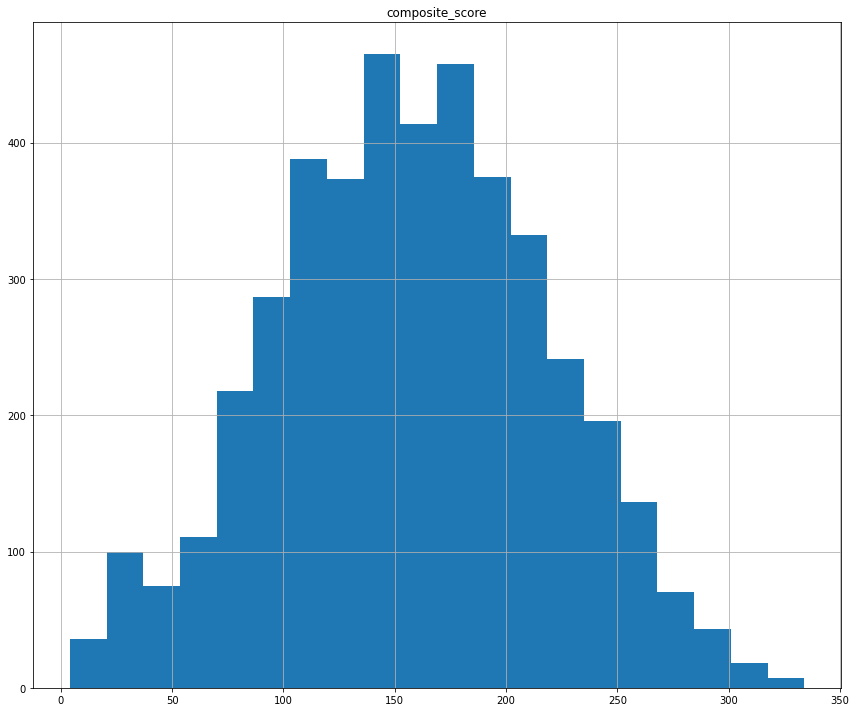

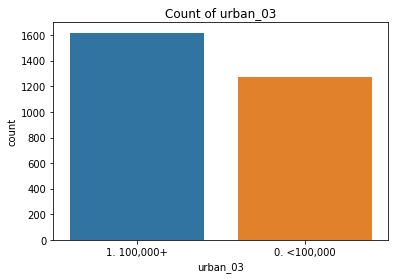

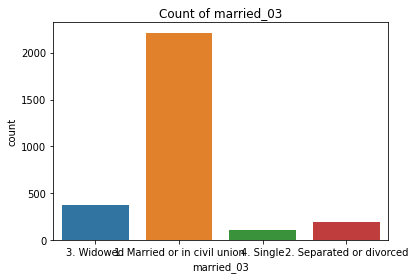

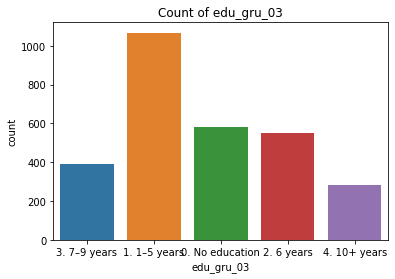

In [196]:

# Univariate analysis of numerical columns (histogram)
numerical_columns = ['composite_score', 'age_03', 'age_12', 'bmi_03', 'bmi_12']
data[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Univariate analysis of categorical columns (bar chart)
categorical_columns = ['urban_03', 'married_03', 'edu_gru_03']
for col in categorical_columns:
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.show()


b) Bivariate Analysis

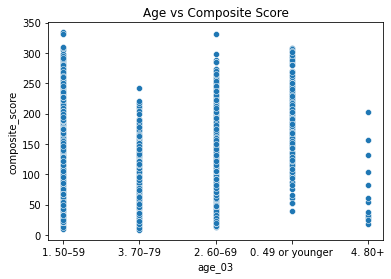

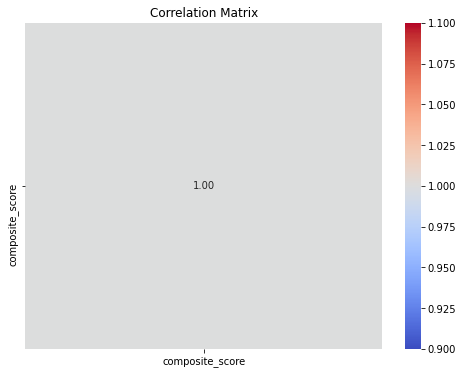

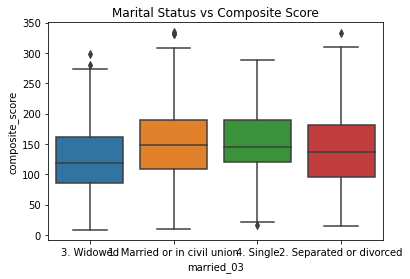

In [197]:
# Scatter plot to explore relationship between 'age_03' and 'composite_score'
sns.scatterplot(data=data, x='age_03', y='composite_score')
plt.title('Age vs Composite Score')
plt.show()

# Correlation heatmap to explore relationships between numerical features
numerical_columns = ['composite_score', 'age_03', 'bmi_03', 'bmi_12']
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box plot for numerical vs categorical
sns.boxplot(data=data, x='married_03', y='composite_score')
plt.title('Marital Status vs Composite Score')
plt.show()


In [198]:
# Find missing values

print(test_features.isnull().sum())
print(data.isnull().sum())

uid             0
age_03        249
urban_03      249
married_03    249
n_mar_03      251
             ... 
a21_12        808
a22_12        809
a33b_12       808
a34_12        277
j11_12         24
Length: 184, dtype: int64
uid                   0
year                  0
composite_score       0
age_03             1456
urban_03           1454
                   ... 
a21_12             4288
a22_12             4295
a33b_12            4288
a34_12             1601
j11_12               89
Length: 186, dtype: int64


In [199]:
#check the percentage of missing values
missing_percentage = (data.isnull().mean() * 100)

# Display the missing percentage
print("Missing Value Percentage:\n", missing_percentage)

Missing Value Percentage:
 uid                 0.000000
year                0.000000
composite_score     0.000000
age_03             33.525213
urban_03           33.479162
                     ...    
a21_12             98.733594
a22_12             98.894773
a33b_12            98.733594
a34_12             36.863919
j11_12              2.049275
Length: 186, dtype: float64


In [200]:
# Drop columns with more than 50% missing values in both datasets
threshold = 0.5
data = data.loc[:,data.isnull().mean() < threshold]
test = test_features.loc[:, test_features.isnull().mean() < threshold]
data
test_features

uid    age_03     urban_03                    married_03  n_mar_03  \
0    abxu       NaN          NaN                           NaN       NaN   
1    aeol       NaN          NaN                           NaN       NaN   
2    afnb       NaN          NaN                           NaN       NaN   
3    ajfh       NaN          NaN                           NaN       NaN   
4    ajvq  2. 60–69  1. 100,000+  1. Married or in civil union       1.0   
..    ...       ...          ...                           ...       ...   
814  zvut       NaN          NaN                           NaN       NaN   
815  zxrm  3. 70–79  0. <100,000  1. Married or in civil union       1.0   
816  zzez       NaN          NaN                           NaN       NaN   
817  zzft  1. 50–59  1. 100,000+  1. Married or in civil union       1.0   
818  zzhd  1. 50–59  0. <100,000  1. Married or in civil union       1.0   

          edu_gru_03 n_living_child_03  migration_03 glob_hlth_03  \
0                NaN               NaN           NaN          NaN   
1                NaN               NaN           NaN          NaN   
2                NaN               NaN           NaN          NaN   
3                NaN               NaN           NaN          NaN   
4       4. 10+ years         1. 1 or 2           0.0          NaN   
..               ...               ...           ...          ...   
814              NaN               NaN           NaN          NaN   
815  0. No education         1. 1 or 2           0.0      5. Poor   
816              NaN               NaN           NaN          NaN   
817       2. 6 years         1. 1 or 2           0.0      4. Fair   
818       2. 6 years         1. 1 or 2           0.0      3. Good   

     adl_dress_03  ...           rrelgimp_12           rrfcntx_m_12  \
0             NaN  ...                   NaN                    NaN   
1             NaN  ...      1.very important                9.Never   
2             NaN  ...      1.very important                9.Never   
3             NaN  ...  2.somewhat important                9.Never   
4             NaN  ...  2.somewhat important     1.Almost every day   
..            ...  ...                   ...                    ...   
814           NaN  ...      1.very important                9.Never   
815           0.0  ...      1.very important  3.2 or 3 times a week   
816           NaN  ...      1.very important          4.Once a week   
817           0.0  ...      1.very important                9.Never   
818           0.0  ...      1.very important     1.Almost every day   

                  rsocact_m_12  rrelgwk_12  a16a_12  a21_12  a22_12  a33b_12  \
0                          NaN         NaN      NaN     NaN     NaN      NaN   
1                      9.Never       1.Yes      NaN     NaN     NaN      NaN   
2        3.2 or 3 times a week       1.Yes      NaN     NaN     NaN      NaN   
3    5.4 or more times a month        0.No      NaN     NaN     NaN      NaN   
4                4.Once a week        0.No      NaN     NaN     NaN      NaN   
..                         ...         ...      ...     ...     ...      ...   
814             7.Once a month        0.No      NaN     NaN     NaN      NaN   
815                    9.Never        0.No      NaN     NaN     NaN      NaN   
816                    9.Never        0.No      NaN     NaN     NaN      NaN   
817      3.2 or 3 times a week        0.No      NaN     NaN     NaN      NaN   
818                    9.Never        0.No      NaN     NaN     NaN      NaN   

     a34_12                             j11_12  
0       NaN  Wood, mosaic, or other covering 1  
1       NaN                         Concrete 2  
2       NaN  Wood, mosaic, or other covering 1  
3       NaN  Wood, mosaic, or other covering 1  
4      No 2  Wood, mosaic, or other covering 1  
..      ...                                ...  
814     NaN                         Concrete 2  
815    No 2                         Concrete 2  
816     N

In [201]:
# Impute numerical columns with the mean
data.fillna(data.mean(), inplace=True)


In [202]:
# Impute categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


b. Data Types and Encoding

In [203]:
# Print column names to check for exact matches
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12',
       'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12',
       'j11_12'],
      dtype='object', length=173)


In [204]:
# Clean column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Check if the columns now exist
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12',
       'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12',
       'j11_12'],
      dtype='object', length=173)


In [205]:
# Check the data types for all columns
print(data.dtypes)

# Ensure that the columns you expect to be numerical are converted to numeric
numerical_columns = data.select_dtypes(include=['number']).columns
print(f"Numerical columns: {numerical_columns}")




uid                object
year                int64
composite_score     int64
age_03             object
urban_03           object
                    ...  
rrfcntx_m_12       object
rsocact_m_12       object
rrelgwk_12         object
a34_12             object
j11_12             object
Length: 173, dtype: object
Numerical columns: Index(['year', 'composite_score', 'n_mar_03', 'migration_03', 'adl_dress_03',
       'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03',
       'adl_toilet_03',
       ...
       'sinc_pension_03', 'rearnings_12', 'searnings_12', 'hincome_12',
       'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12', 'hinc_cap_12',
       'rinc_pension_12', 'sinc_pension_12'],
      dtype='object', length=136)


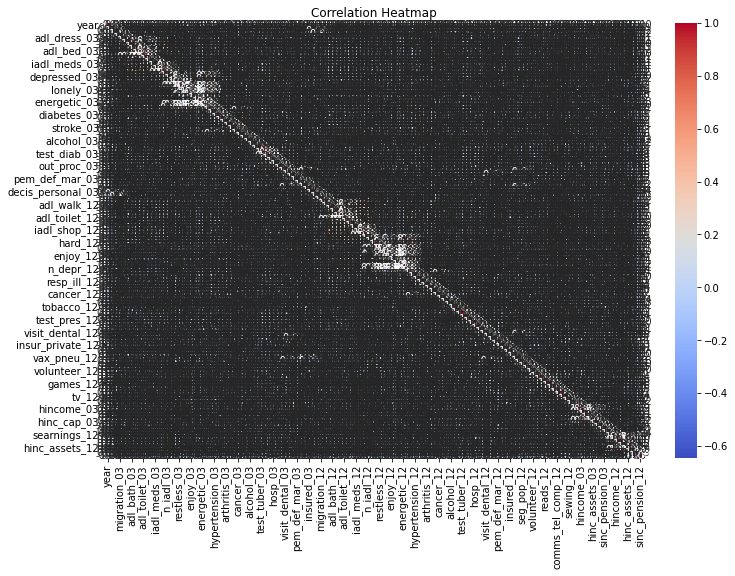

In [206]:
import seaborn as sns

# Correlation matrix (for numerical columns)
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [207]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# For categorical variables, apply encoding ie OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])




Index(['uid', 'age_03', 'urban_03', 'married_03', 'edu_gru_03',
       'n_living_child_03', 'glob_hlth_03', 'employment_03', 'age_12',
       'urban_12', 'married_12', 'edu_gru_12', 'n_living_child_12',
       'glob_hlth_12', 'bmi_12', 'decis_famil_12', 'decis_personal_12',
       'employment_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12',
       'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'ragender',
       'rameduc_m', 'rafeduc_m', 'sgender_03', 'rrelgimp_03', 'sgender_12',
       'rjlocc_m_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12',
       'rrelgwk_12', 'a34_12', 'j11_12'],
      dtype='object')


In [208]:
# Check the result of transformations like encoding
print(data [categorical_columns].head())  


   uid  age_03  urban_03  married_03  edu_gru_03  n_living_child_03  \
0  0.0     1.0       1.0         0.0         1.0                2.0   
1  1.0     1.0       1.0         0.0         1.0                2.0   
2  2.0     1.0       1.0         0.0         1.0                2.0   
3  2.0     1.0       1.0         0.0         1.0                2.0   
4  3.0     1.0       1.0         2.0         3.0                1.0   

   glob_hlth_03  employment_03  age_12  urban_12  ...  sgender_03  \
0           3.0            0.0     2.0       0.0  ...         0.0   
1           3.0            0.0     1.0       1.0  ...         0.0   
2           3.0            0.0     1.0       0.0  ...         0.0   
3           3.0            0.0     1.0       0.0  ...         0.0   
4           3.0            2.0     2.0       1.0  ...         0.0   

   rrelgimp_03  sgender_12  rjlocc_m_12  rrelgimp_12  rrfcntx_m_12  \
0          0.0         1.0         14.0          1.0           8.0   
1          0.0    

In [209]:
#One hot encode for nominal variables

nominal_columns = ['urban_03', 'urban_12', 'married_03', 'married_12']  
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(), nominal_columns)
    ],
    remainder='passthrough'  # Leave the other columns as they are
)

# Apply the transformations
data_transformed = preprocessor.fit_transform(data)


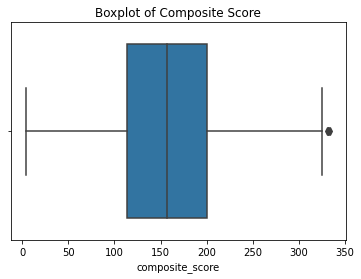

In [210]:
#check for outliers
# Box plot to check for outliers in 'composite_score'
sns.boxplot(x=data['composite_score'])
plt.title('Boxplot of Composite Score')
plt.show()



Group Data by Key Features

- Understand how the target variable (e.g., composite_score) is distributed across different groups or categories.

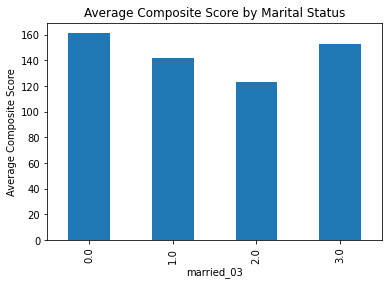

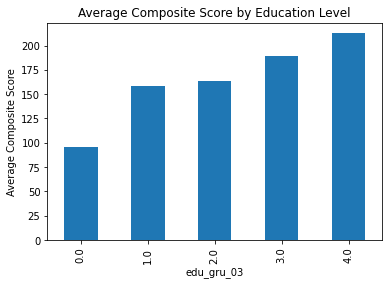

In [211]:
# Group by a categorical variable (e.g., marital status) and calculate mean composite_score
data.groupby('married_03')['composite_score'].mean().plot(kind='bar')
plt.title('Average Composite Score by Marital Status')
plt.ylabel('Average Composite Score')
plt.show()

# Group by education level and calculate the average score
data.groupby('edu_gru_03')['composite_score'].mean().plot(kind='bar')
plt.title('Average Composite Score by Education Level')
plt.ylabel('Average Composite Score')
plt.show()


 Feature Relationships

 - Investigate how features relate to each other and to the target variable (composite_score)

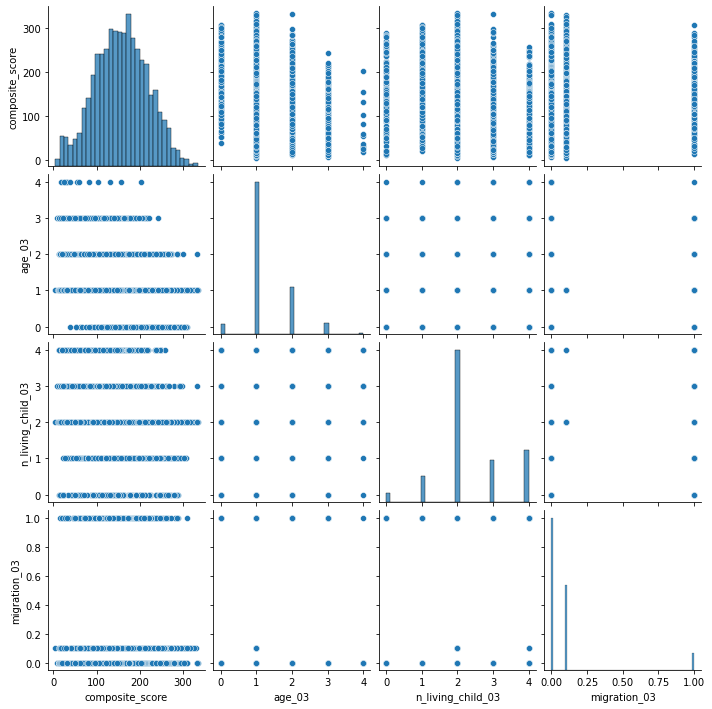

composite_score      1.000000
edu_gru_12           0.631928
edu_gru_03           0.409638
rameduc_m            0.360284
reads_12             0.350174
                       ...   
n_living_child_03   -0.288198
rrfcntx_m_12        -0.294694
n_living_child_12   -0.320974
age_03              -0.356160
age_12              -0.412397
Name: composite_score, Length: 173, dtype: float64


In [212]:
# Pair plot to visualize relationships between multiple numerical variables
sns.pairplot(data[['composite_score', 'age_03', 'n_living_child_03', 'migration_03']])
plt.show()

# Correlation with composite_score (if it's continuous)
corr_with_target = data.corr()['composite_score'].sort_values(ascending=False)
print(corr_with_target)


- From the analysis the features that mostly influence the target variable(composite_score) are:

1). edu_gru_12 and edu_gru_03 , they have high positive correlation of 0.63 and 0.41 respectively.

2). age_12  and age_03  also have a high negative correlation of -0.412397 and -0.356160 respectivelt,

In [213]:

# Standardizing numerical columns
numerical_columns = ['composite_score', 'age_03', 'age_12', 'bmi_12']  
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


Creating New Features

1. Age Groups: Grouping ages into ranges can help capture patterns that might be more meaningful than using continuous age.

In [214]:
# Create age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
data['age_group'] = pd.cut(data['age_03'], bins=age_bins, labels=age_labels, right=False)


2. Health Indicator

Create a health score or categorize the status into "healthy," "moderate," or "poor.

In [215]:
# Creating a health score based on a categorical variable
health_mapping = {
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
data['health_score'] = data['glob_hlth_03'].map(health_mapping)


In [216]:
# Check the data types of all columns
print(data.dtypes)


uid                 float64
year                  int64
composite_score     float64
age_03              float64
urban_03            float64
                     ...   
rrelgwk_12          float64
a34_12              float64
j11_12              float64
age_group          category
health_score        float64
Length: 175, dtype: object


In [217]:
# Display all column names in the dataset
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'age_group',
       'health_score'],
      dtype='object', length=175)


In [219]:
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'age_group',
       'health_score'],
      dtype='object', length=175)


### Model Building

In [ ]:
# Select features and target variable
# Select the columns to use for modeling (numerical and transformed categorical columns)
features = ['composite_score', 'age_03', 'n_mar_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'edu_gru_03_4.0', 'n_living_child_03_1.0', 'rrelgimp_12_1.0']  # Adjust this based on your features
X = data[features]
y = data['composite_score']  


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set: {X_test.shape[0]} rows")

Training set: 3474 rows
Testing set: 869 rows


In [ ]:
# Check for missing data
print(X.isnull().sum())

# Optionally, drop or fill missing values
X.fillna(X.mean(), inplace=True)  # Example: Fill missing values with the mean for numerical features


composite_score          0
age_03                   0
n_mar_03                 0
glob_hlth_03             0
adl_dress_03             0
adl_walk_03              0
adl_bath_03              0
adl_eat_03               0
edu_gru_03_4.0           0
n_living_child_03_1.0    0
rrelgimp_12_1.0          0
dtype: int64


### Choosing the Model

In [ ]:
# Check the type of the target variable
print(y.dtype)

# Check if the target variable has unique values and distribution
print(y.value_counts())  # For categorical targets
print(y.describe())      # For continuous targets


float64
 0.295278    36
 0.623672    36
 0.393796    35
 0.344537    34
-0.213732    34
             ..
 2.446256     1
 1.937246     1
 2.889587     1
-2.446808     1
 2.856748     1
Name: composite_score, Length: 307, dtype: int64
count    4.343000e+03
mean     7.198683e-17
std      1.000115e+00
min     -2.512487e+00
25%     -7.063222e-01
50%     -2.759928e-04
75%      7.057702e-01
max      2.906007e+00
Name: composite_score, dtype: float64


Since the composite_score is a continuous variable with values ranging from negative to positive, I will use the Linear regression model

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5.006732126347176e-31
R-squared: 1.0


An MSE near zero and an R-squared of 1.0 indicate that the model fits the data perfectly. 

However, this level of fit is unusual and often implies that the model might have overfitted the training data. 

This perfect result could stem from:

- Data Leakage: Some features in X may be too closely related to composite_score, causing the model to inadvertently learn the target 
rather than generalizing from features.

- Low Variability in the Data: If the dataset lacks sufficient variation in X relative to y, even a simple model might achieve a perfect fit.

- Small Dataset or Redundant Features: A very small dataset or features directly correlated with the target can also lead to overfitting.

I will use cross validation with 5 Folds to adress overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean CV R-squared:", cv_scores.mean())


Cross-Validation R-squared Scores: [1. 1. 1. 1. 1.]
Mean CV R-squared: 1.0


A cross-validation R-squared score of 1.0 across all folds confirms that the model is still fitting perfectly.

I will Inspect the correlations between features and the target to identify any that might be overly similar to composite_score

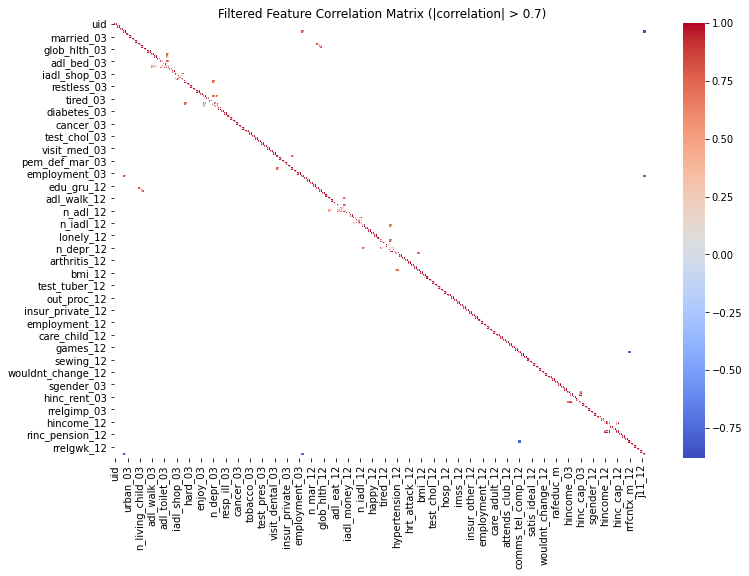

In [ ]:
# Set threshold for strong correlations
threshold = 0.7
strong_corr = corr[(corr >= threshold) | (corr <= -threshold)]

# Plot filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm')
plt.title("Filtered Feature Correlation Matrix (|correlation| > 0.7)")
plt.show()


In [ ]:

# Set a correlation threshold
threshold = 0.8

# Calculate the correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Features to drop:", to_drop)


Features to drop: ['n_iadl_03', 'cesd_depressed_03', 'migration_12', 'n_iadl_12', 'cesd_depressed_12', 'hinc_cap_03', 'hinc_business_12', 'hinc_cap_12', 'age_group']


In [ ]:
# Drop the identified features
data = data.drop(columns=to_drop)


In [ ]:
# Check the shape and column names after dropping features
print("Remaining features:", data.columns)
print("Data shape after dropping correlated features:", data.shape)


Remaining features: Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'hinc_assets_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12',
       'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12',
       'health_score'],
      dtype='object', length=166)
Data shape after dropping correlated features: (4343, 166)


In [ ]:
missing_values = X.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_columns)


Columns with missing values:
 health_score    4343
dtype: int64


In [ ]:
print(data.index)  # Check the available indices


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342],
           dtype='int64', length=4343)


In [ ]:
print(data.isnull().sum())  # Count missing values per column


uid                   0
year                  0
composite_score       0
age_03                0
urban_03              0
                   ... 
rsocact_m_12          0
rrelgwk_12            0
a34_12                0
j11_12                0
health_score       4343
Length: 166, dtype: int64


In [ ]:
data['health_score'].fillna(0, inplace=True)  # Fill with 0



In [ ]:
print(data.isnull().sum())  # To confirm missing values are handled


uid                0
year               0
composite_score    0
age_03             0
urban_03           0
                  ..
rsocact_m_12       0
rrelgwk_12         0
a34_12             0
j11_12             0
health_score       0
Length: 166, dtype: int64


In [224]:

# Initialize scaler
scaler = StandardScaler()

# Scale the features (excluding target variable if it's included in `data`)
data_scaled = scaler.fit_transform(data)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['composite_score'], axis=1)  
y = data['composite_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
